In [1]:
# import neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter(action = "ignore")

In [2]:
df = pd.read_csv('perfectly_DigitalMusic.csv',sep="\t")
df.drop(df[df.reviewText_new.isnull()].index, inplace=True)
df = df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1)

In [3]:
df.head(2)

,asin,overall,summary,reviewText,reviewText_new
0,5555991584,5.0,Enya's last great album,"It's hard to believe ""Memory of Trees"" came ou...","hard believe ""memory trees"" came 11 years ago;..."
1,5555991584,5.0,Enya at her most elegant,"A clasically-styled and introverted album, Mem...","clasically-styled introverted album, memory tr..."


# Plot with WordCloud

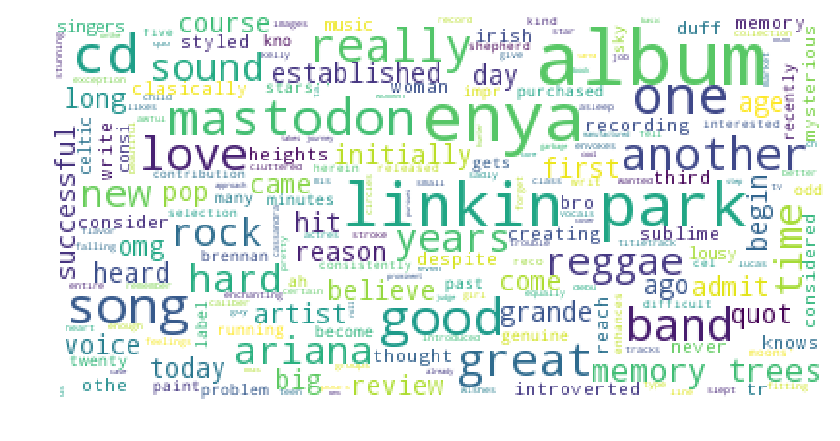

In [4]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

#mpl.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df['reviewText_new']))
plt.figure(figsize=(10,9))
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word4.png")

In [5]:
data=df[['reviewText_new','summary','overall']]
# ignore all 3* reviews
data = data[data["overall"] != 3]
# positive sentiment = 4* or 5* reviews
data["sentiment"] = data["overall"] >= 4
data= data.drop(['overall'], axis=1)

### tf-idf vectorizer

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df = 0.3,             #max_df is used for removing terms that appear too frequently, also known as "corpus-specific stop words". For example:
                                                       #max_df = 0.50 means "ignore terms that appear in more than 50% of the documents".
                                                       #max_df = 25 means "ignore terms that appear in more than 25 documents".
                             stop_words='english',
                             sublinear_tf=True, 
                             use_idf=True,
                             lowercase=True)
REVIEW_x_train_vectors = vectorizer.fit_transform(data.reviewText_new)
SUMMARY_x_train_vectors = vectorizer.fit_transform(data.summary)

x_review_train, x_review_test, y_review_train, y_review_test = train_test_split(
    REVIEW_x_train_vectors, data.sentiment, test_size=0.2, random_state=42)
x_summary_train, x_summary_test, y_summary_train, y_summary_test = train_test_split(
    SUMMARY_x_train_vectors, data.sentiment, test_size=0.2, random_state=42)

In [7]:
print("sau khi vectorizer: {}".format(REVIEW_x_train_vectors))

sau khi vectorizer:   (0, 44724)	0.058725344698
  (0, 12835)	0.0731594835955
  (0, 61610)	0.179572431437
  (0, 100070)	0.216803341664
  (0, 17694)	0.0645540766317
  (0, 761)	0.0850731499882
  (0, 108889)	0.0522535953722
  (0, 5578)	0.079351037634
  (0, 45828)	0.109239608664
  (0, 71139)	0.136661789802
  (0, 33915)	0.305208997838
  (0, 66052)	0.0817293904379
  (0, 5481)	0.144137267381
  (0, 74091)	0.0542881182194
  (0, 6921)	0.202838581709
  (0, 26318)	0.0620873548077
  (0, 77601)	0.0909080705651
  (0, 1185)	0.108392037287
  (0, 24734)	0.0854733025343
  (0, 90349)	0.116398615258
  (0, 104987)	0.0547702819783
  (0, 5604)	0.0950843205211
  (0, 81129)	0.170290615197
  (0, 83299)	0.115332558199
  (0, 83215)	0.144591615603
  :	:
  (57916, 57012)	0.108456465469
  (57916, 38356)	0.143800743638
  (57916, 59297)	0.105450061337
  (57916, 87365)	0.0786946556313
  (57916, 136)	0.113737648302
  (57916, 13553)	0.120084148115
  (57916, 15525)	0.0931318224974
  (57916, 47591)	0.0852265228382
  (57916, 

In [8]:
print("",x_review_train.shape, y_review_train.shape,"\n",x_review_test.shape, y_review_test.shape)

 (46333, 109776) (46333,) 
 (11584, 109776) (11584,)


# Using naive-bayes for Review Feature

In [9]:
from sklearn.naive_bayes import MultinomialNB
# Train the model
REVIEW_naivebayes_clf = MultinomialNB()
REVIEW_naivebayes_clf.fit(x_review_train,y_review_train)

from sklearn.model_selection import cross_val_score
print('Value after using hold-out: ', REVIEW_naivebayes_clf.score(x_review_test, y_review_test))
print('Value after using cross validation with 10-fold:', 
      cross_val_score(REVIEW_naivebayes_clf, REVIEW_x_train_vectors, data.sentiment, cv=10).mean())

Value after using hold-out:  0.903660220994
Value after using cross validation with 10-fold: 0.899286923953


# Using naive-bayes for Summary Feature

In [10]:
from sklearn.naive_bayes import MultinomialNB
# Train the model
SUMMARY_naivebayes_clf = MultinomialNB()
SUMMARY_naivebayes_clf.fit(x_summary_train,y_summary_train)

from sklearn.model_selection import cross_val_score
print('Value after using hold-out: ', SUMMARY_naivebayes_clf.score(x_summary_test, y_summary_test))
print('Value after using cross validation with 10-fold:', 
      cross_val_score(SUMMARY_naivebayes_clf, SUMMARY_x_train_vectors, data.sentiment, cv=10).mean())

Value after using hold-out:  0.912810773481
Value after using cross validation with 10-fold: 0.907591890467


In [11]:
tes = np.array(['this song is so bad !!!'])
test = vectorizer.transform(tes)
SUMMARY_naivebayes_clf.predict(test)

array([ True], dtype=bool)

In [15]:
tes = np.array(['this song sucks as fuck '])
test = vectorizer.transform(tes)
SUMMARY_naivebayes_clf.predict(test)

array([ True], dtype=bool)

In [14]:
tes = np.array(['fucking pussy dick sucks as fuck cunt'])
test = vectorizer.transform(tes)
SUMMARY_naivebayes_clf.predict(test)

array([False], dtype=bool)

# Time to classify by applying some models

## Doing with meaningful_review feature

In [7]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from operator import itemgetter

names = ["MultinomialNB", "Linear SVM"]
classifiers = [
    MultinomialNB(),
    SVC(kernel="linear", C=0.025)
    ]

# iterate over classifiers
results = {}
k_fold_results = {}

for name, clf in zip(names, classifiers):
    print ("Training " + name + " classifier...")
    print("Doing Houd-out...")
    clf.fit(x_summary_train,y_summary_train)
    score = clf.score(x_summary_test, y_summary_test)
    results[name] = score
    print("Doing K-fold cross validation...")
    value_cross_val_score = cross_val_score(clf, REVIEW_x_train_vectors, data.sentiment, cv=5).mean()
    k_fold_results[name]= value_cross_val_score

print ("---------------------------")
print ("Evaluation results")
print ("---------------------------")

# sorting results and print out
sorted(results.items(), key=itemgetter(1)) #The key= parameter of sort requires a key function (to be applied to be objects to be sorted) rather than a single key value and
#that is just what operator.itemgetter(1) will give you: A function that grabs the first item from a list-like object.
for name in results:
    print ("Hold-out: ",name + " accuracy: %0.3f" % results[name])
    print ("Cross validation 5-fold: ",name + " accuracy: %0.3f" % k_fold_results[name])

Training MultinomialNB classifier...
Doing Houd-out...
Doing K-fold cross validation...
Training Linear SVM classifier...
Doing Houd-out...
Doing K-fold cross validation...
---------------------------
Evaluation results
---------------------------
Hold-out:  MultinomialNB accuracy: 0.904
Cross validation 5-fold:  MultinomialNB accuracy: 0.899
Hold-out:  Linear SVM accuracy: 0.904
Cross validation 5-fold:  Linear SVM accuracy: 0.900


## Doing with summary feature

In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from operator import itemgetter

names = ["MultinomialNB", "Linear SVM"]
classifiers = [
    MultinomialNB(),
    SVC(kernel="linear", C=0.025)
    ]

# iterate over classifiers
results = {}
k_fold_results = {}

for name, clf in zip(names, classifiers):
    print ("Training " + name + " classifier...")
    print("Doing Houd-out...")
    clf.fit(x_summary_train,y_summary_train)
    score = clf.score(x_summary_test, y_summary_test)
    results[name] = score
    print("Doing K-fold cross validation...")
    value_cross_val_score = cross_val_score(clf, SUMMARY_x_train_vectors, data.sentiment, cv=3).mean()
    k_fold_results[name]= value_cross_val_score

print ("---------------------------")
print ("Evaluation results")
print ("---------------------------")

# sorting results and print out
sorted(results.items(), key=itemgetter(1))#The key= parameter of sort requires a key function (to be applied to be objects to be sorted) rather than a single key value and
#that is just what operator.itemgetter(1) will give you: A function that grabs the first item from a list-like object.
for name in results:
    print ("Hold-out: ",name + " accuracy: %0.3f" % results[name])
    print ("Cross validation 3-fold: ",name + " accuracy: %0.3f" % k_fold_results[name])

Training MultinomialNB classifier...
Doing Houd-out...
Doing K-fold cross validation...
Training Linear SVM classifier...
Doing Houd-out...
Doing K-fold cross validation...
---------------------------
Evaluation results
---------------------------
Hold-out:  MultinomialNB accuracy: 0.913
Cross validation 3-fold:  MultinomialNB accuracy: 0.906
Hold-out:  Linear SVM accuracy: 0.904
Cross validation 3-fold:  Linear SVM accuracy: 0.900
